In [1]:
import utils
utils.assign_free_gpus()
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)

Using GPU index: 0


### Dataset

In [2]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [3]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [4]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [5]:
# Hyperparameters
learning_rate = .0192

num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [6]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|██████████████████████| 938/938 [00:01<00:00, 473.75it/s]


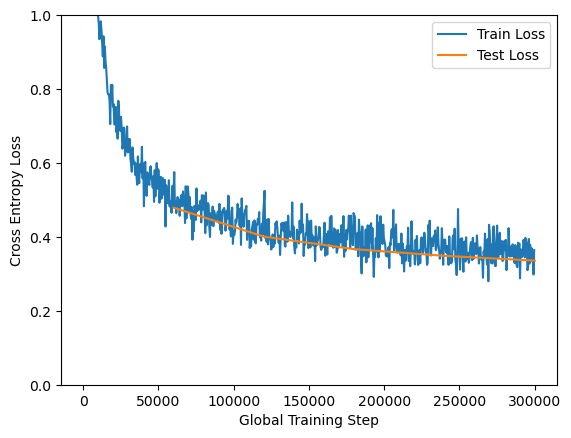

Final Test loss: 0.33583178788803186. Final Test accuracy: 0.9084


In [7]:
# We can now plot the training loss with our utility script

# Plot lossF
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

## Plotting example

In [8]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()

learning_rate = .0192
num_epochs = 6

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_6epochs, test_loss_dict_6epochs = trainer.train(num_epochs)
num_epochs = 5

Training epoch 5: 100%|██████████████████████| 938/938 [00:01<00:00, 471.38it/s]


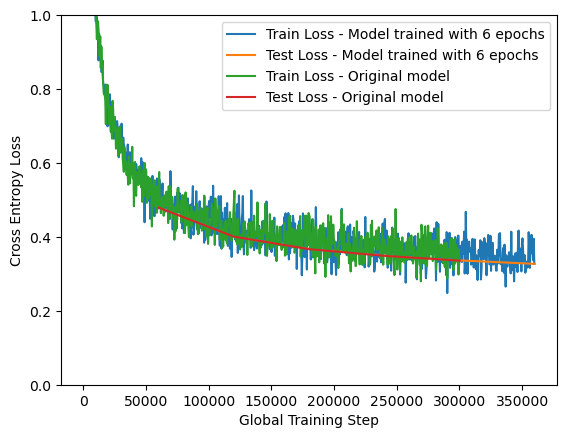

Final Test loss: 0.32698613409973254. Final Test accuracy: 0.9104


In [9]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs")
utils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task A

Training epoch 4: 100%|██████████████████████| 938/938 [00:03<00:00, 290.45it/s]


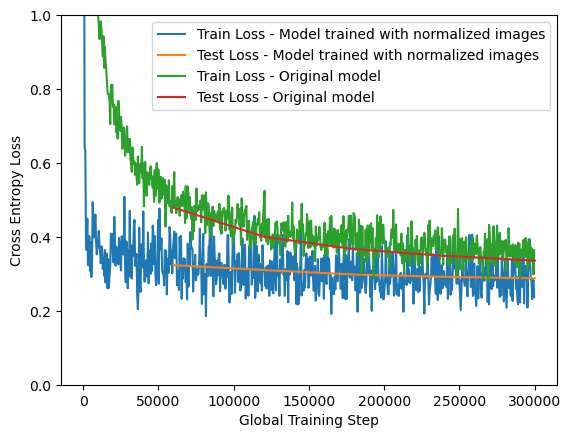

Final Test loss: 0.2879335754936573. Final Test accuracy: 0.9196


In [10]:
## Normalizing
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5)
])

dataloader_train_a, dataloader_test_a = dataloaders.load_dataset(batch_size, image_transform)

## Training
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train_a,
  dataloader_test=dataloader_test_a,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_a, test_loss_a = trainer.train(num_epochs)


# Plot loss
utils.plot_loss(train_loss_a, label="Train Loss - Model trained with normalized images")
utils.plot_loss(test_loss_a, label="Test Loss - Model trained with normalized images")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

final_loss, final_acc = utils.compute_loss_and_accuracy(
dataloader_test_a, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")




### Task B

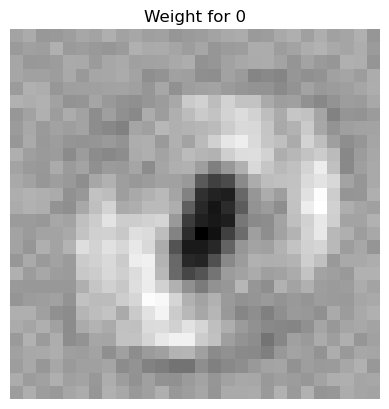

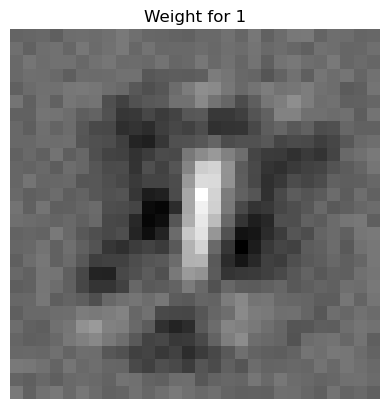

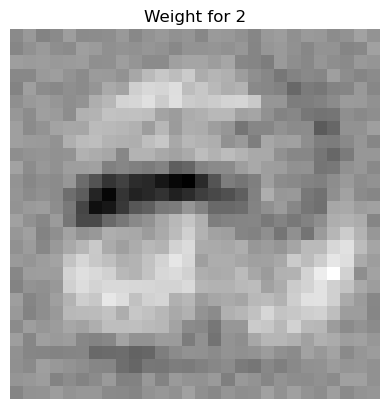

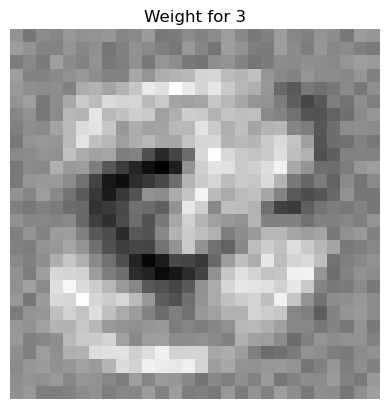

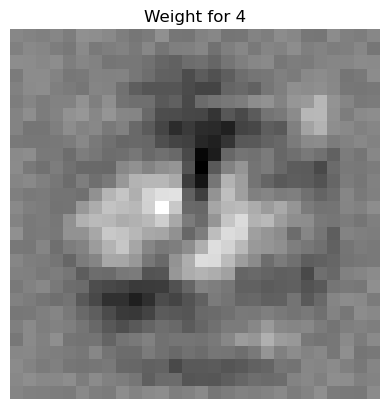

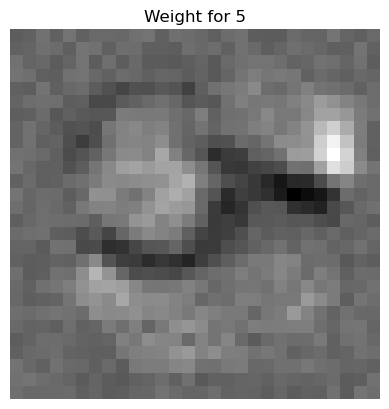

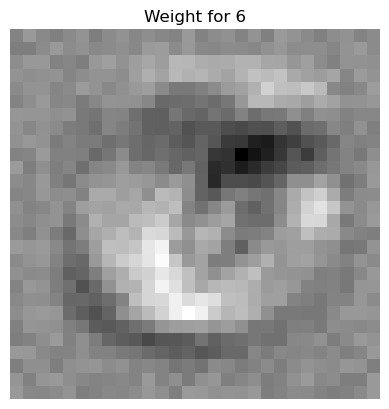

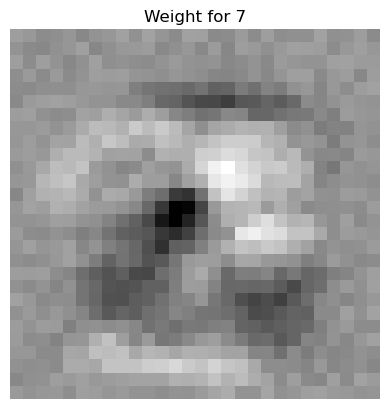

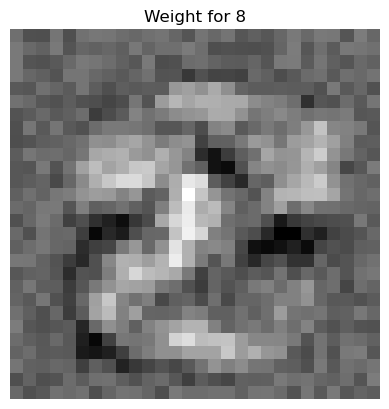

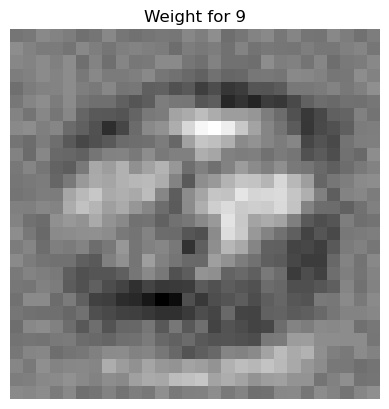

In [11]:
## access the weigth of the fully connected layer
weight = list(model.children())[1].weight.cpu().data

for i in range(10):
    class_weight = weight[i]
    
    class_weight_array = class_weight.numpy().reshape(28, 28) # reshape to 28x28 for mnist images
    plt.figure()
    plt.imshow(class_weight_array, cmap="gray")
    plt.title(f"Weight for {i}")
    plt.axis("off")

plt.show()


### Task C

Training epoch 4: 100%|██████████████████████| 938/938 [00:03<00:00, 290.73it/s]


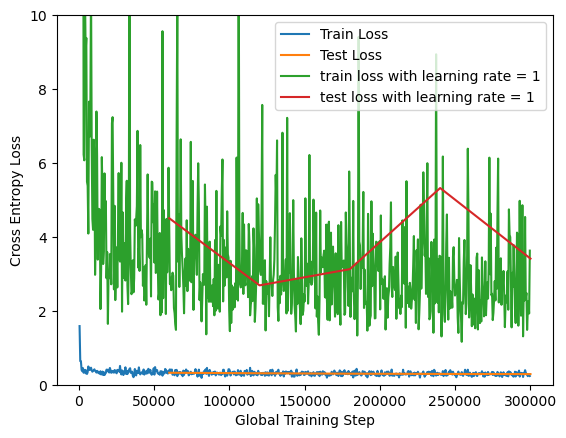

Final Test loss: 3.4117249612500715. Final Test accuracy: 0.8491


In [12]:
# Hyperparameters
## learning_rate = .0192
learning_rate = 1
num_epochs = 5

## Update optimizer with new learning rate
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

dataloader_train_b, dataloader_test_b = dataloaders.load_dataset(batch_size, image_transform)

## TRAINING
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train_b,
  dataloader_test=dataloader_test_b,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_lr1, test_loss_lr1 = trainer.train(num_epochs)

## PLOTTING
utils.plot_loss(train_loss_a, label="Train Loss")
utils.plot_loss(test_loss_a, label="Test Loss")
utils.plot_loss(train_loss_lr1, label="train loss with learning rate = 1")
utils.plot_loss(test_loss_lr1, label="test loss with learning rate = 1")
plt.ylim([0, 10])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4c.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
dataloader_test_b, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task D

Training epoch 4: 100%|██████████████████████| 938/938 [00:03<00:00, 278.86it/s]


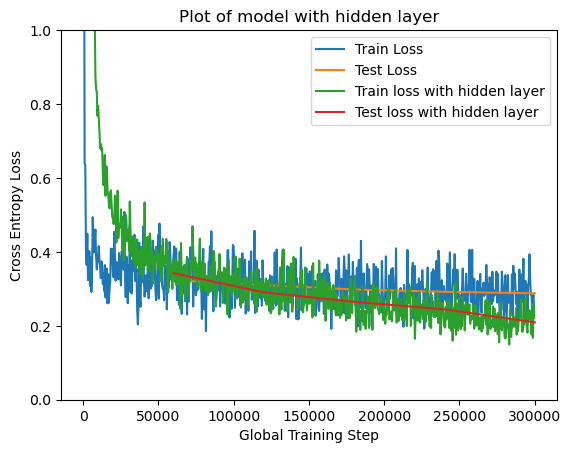

Final Test loss: 0.20945570861125828. Final Test accuracy: 0.938


In [13]:
def create_model_with_layer():
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model

model = create_model_with_layer()

## Hyperparameters
learning_rate = 0.0192
epochs = 5

## Update hyperparameters to what they were previously
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)


dataloader_train_c, dataloader_test_c = dataloaders.load_dataset(batch_size, image_transform)

## TRAINING

trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train_c,
  dataloader_test=dataloader_test_c,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)

train_loss_c, test_loss_c = trainer.train(num_epochs)

## PLOT

# Plot lossF
utils.plot_loss(train_loss_a, label="Train Loss")
utils.plot_loss(test_loss_a, label="Test Loss")
utils.plot_loss(train_loss_c, label="Train loss with hidden layer")
utils.plot_loss(test_loss_c, label="Test loss with hidden layer")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.title("Plot of model with hidden layer")
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4d.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
dataloader_test_c, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")